# Plotting data measured with our own temperature sensor

We use our temperature sensor device to measure the temperature. The sensor is attached to a small computer that transmits the data via internet to a web page 'dweetio', where the data
are collected and updated. We have the sensor setup to send 1-minute average temperatures.
The temperature data on the web page gets updated to the latest measurement every minute.
In the code cells below we provide the support to read the temperature from the web page.

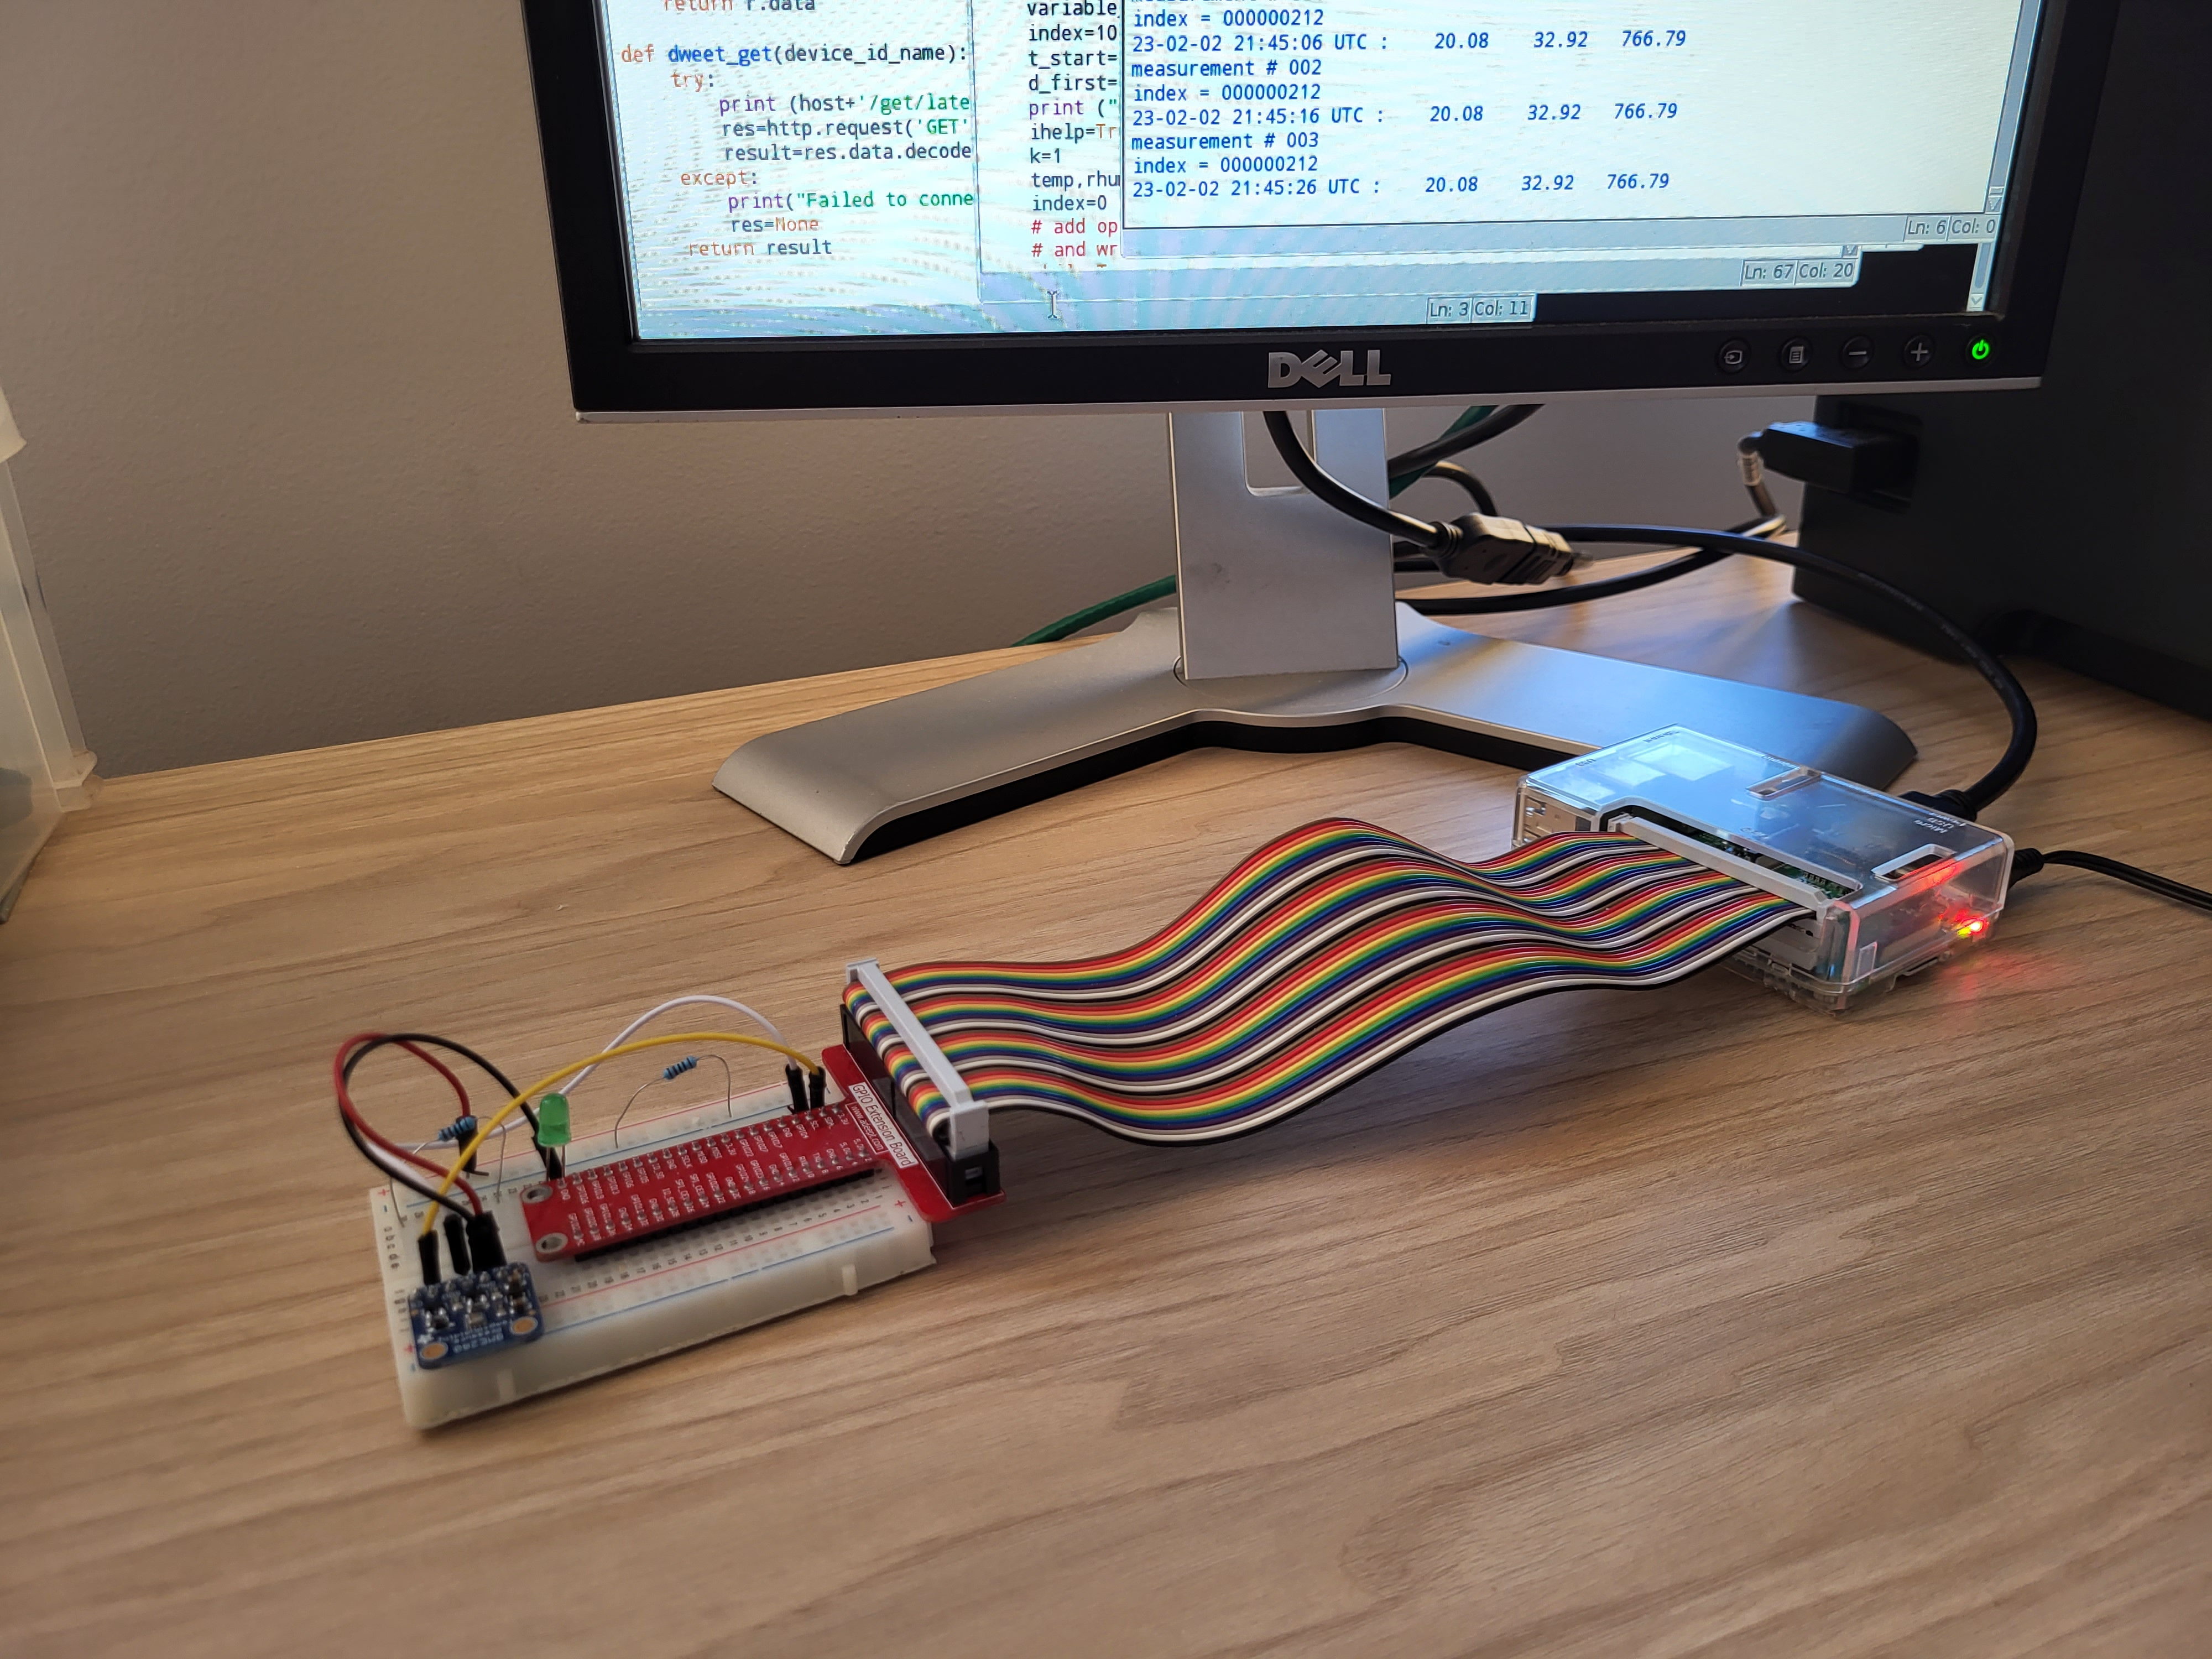

In [1]:
# show image of the device
from IPython import display
# use local shared file, or use the repository file
display.Image("/home11/staff/timm/Public/Data/raspipy12345-device.jpg",width=400)

## Supporting functions
Beginners can skip this part of the code. 
We will use these functions to get temperature data from the dweetio device named 'raspipy12345'. This is - while powered up and running - 

In [2]:
# for support of data exchange via dweetio
import urllib3
from urllib.parse import urlencode
import json


########################################
# see urllib3 documentation
########################################

# establish an http support object
http = urllib3.PoolManager(timeout=4.0)
# the default host URL root
host="https://dweet.io"
# choose a unique name
device_id_name="raspipy12345"

def dweet_put(device_id_name,data={'temp':'NA','units':'deg C','datetime':'%Y-%m-%d:%H-%M-%S'}):
    encoded_data = urlencode(data)
    print(encoded_data)
    try:
        print(host+'/dweet/for/'+device_id_name+"?"+encoded_data)
        print (encoded_data)
        # must use GET not POST for this dweetio servive!
        r = http.request('GET',host+'/dweet/for/'+device_id_name+"?"+encoded_data)
        return r.data
    except:
        print ("Failed to connect to host")
        return None

def dweet_get(device_id_name):
    try:
        print (host+'/get/latest/dweet/for/'+device_id_name)
        res=http.request('GET', host+'/get/latest/dweet/for/'+device_id_name)
        result=res.data.decode()
    except:
        print("Failed to connect to host")
        result=None
    return result

# get the data from the server (text of type string)
def get_temp(name='raspipy12345'):
    '''looks up latest temperature a device dweeting under the id 'name'
    
    Input parameters:
         name: string (optional), name of the dweeting device.
    Returns:
        float (temperature as float)
    '''
    result=dweet_get('raspipy12345')
    # use JSON to convert into dictionary
    data=json.loads(result)
    date=data['with'][0]['content']['time2']
    temp=float(data['with'][0]['content']['temp'])
    return date,temp

***
### Main Python code
***

We constructed a loop so that we read 10 temperature values.
The temperatures are stored in a variable called __temp__.
Here we make use of a new Python data type. Variable temperature has an object of type  (or class we say in Python to be precise) __list__. 


In [3]:
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [ ]:
i=0
index=[]
temp=[] # empty list
for i in range(10):
    print(i)
    index.append(i)
    date_time,t=get_temp()
    temp.append(t)
    #wait 60 seconds
    print("got data from dweetio (date and temperature in C)")
    print(date_time,t)
    time.sleep(60)
    # then we repeat the block of commands (line 5-9)
temp



0
https://dweet.io/get/latest/dweet/for/raspipy12345
got data from dweetio (date and temperature in C)
24-02-05 17:24:40 UTC 21.2


***
## Make a simple plot
***



In [ ]:
plt.plot(index,temp)

### References:

- [dweetio](https://dweet.io/)
- [Raspberry PI](https://www.raspberrypi.com/)
- [Adafruit low-cost DIY sensors](https://www.adafruit.com/category/56)